In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
import seaborn as sns


# Set up read of csv file
netflix_path = "netflix_template.csv"

netflix_info = pd.read_csv(netflix_path)

# testing to ensure csv was read
netflix_info.head()

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...


In [75]:
netflix_info_df = netflix_info.copy()


In [76]:
netflix_info_df

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,Czech Republic,United Kingdom,2020.0,2005,TV-MA,99 min,Dramas,International Movies,NaN,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,NaN,NaN,2019.0,2015,TV-14,111 min,Dramas,International Movies,Music & Musicals,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,NaN,NaN,2020.0,2019,TV-MA,44 min,Documentaries,International Movies,Music & Musicals,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,NaN,NaN,2020.0,2019,TV-PG,1 Season,International TV Shows,Reality TV,NaN,Dessert wizard Adriano Zumbo looks for the nex...


In [77]:
renamed_Genres_df = netflix_info_df.rename(columns={"TYPE1/listed_in": "Genres"
                                                })
renamed_Genres_df

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,Genres,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,NaN,NaN,2016.0,2016,TV-MA,93 min,Dramas,International Movies,NaN,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,NaN,NaN,2018.0,2011,R,78 min,Horror Movies,International Movies,NaN,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,NaN,NaN,2017.0,2009,PG-13,80 min,Action & Adventure,Independent Movies,Sci-Fi & Fantasy,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,NaN,NaN,2020.0,2008,PG-13,123 min,Dramas,NaN,NaN,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,Czech Republic,United Kingdom,2020.0,2005,TV-MA,99 min,Dramas,International Movies,NaN,When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,NaN,NaN,2019.0,2015,TV-14,111 min,Dramas,International Movies,Music & Musicals,A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,NaN,NaN,2020.0,2019,TV-MA,44 min,Documentaries,International Movies,Music & Musicals,"In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,NaN,NaN,2020.0,2019,TV-PG,1 Season,International TV Shows,Reality TV,NaN,Dessert wizard Adriano Zumbo looks for the nex...


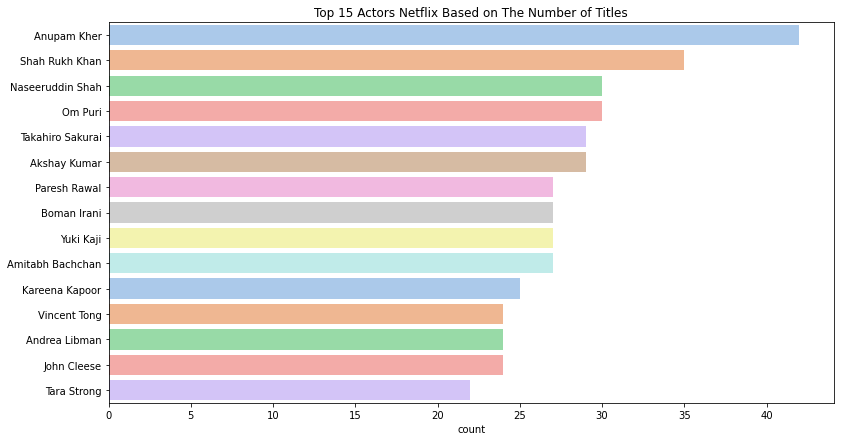

In [78]:

filtered_cast_shows = renamed_Genres_df[renamed_Genres_df.cast != 'No Cast'].set_index('Genres').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 15 Actors Netflix Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:15], palette='pastel')
plt.show()

In [79]:
 movie_types = ['Dramas',
 'Comedies',
 'Documentaries',
 'Action & Adventure',
 'International TV Shows',
 'Children & Family Movies',
 'Crime TV Shows',
 "Kids' TV",
 'Stand-Up Comedy',
 'Horror Movies',
 'British TV Shows',
 'Docuseries',
 'Anime Series',
 'International Movies',
 'TV Comedies']

In [80]:
netflix_countries = renamed_Genres_df.loc[renamed_Genres_df["country"]=="United States"]
netflix_country_usa_df = pd.DataFrame(netflix_countries)
netflix_country_usa_df.count()

show_id         2883
type            2883
title           2883
director        2088
cast            2550
country         2883
country.1        327
country.2         90
YEAR_added      2841
release_year    2883
rating          2880
duration        2883
Genres          2883
TYPE2           1680
TYPE3            574
description     2883
dtype: int64

In [81]:
#find overall count of countries 
netflix_info_countries = renamed_Genres_df['country'].value_counts()

netflix_info_countries

United States     2883
India              956
United Kingdom     577
Canada             259
Japan              237
                  ... 
Somalia              1
Paraguay             1
Iran                 1
Jordan               1
Slovenia             1
Name: country, Length: 81, dtype: int64

In [82]:
netflix_info_countries_df = pd.DataFrame(netflix_info_countries)
Twenty_countries = netflix_info_countries_df.head(20)

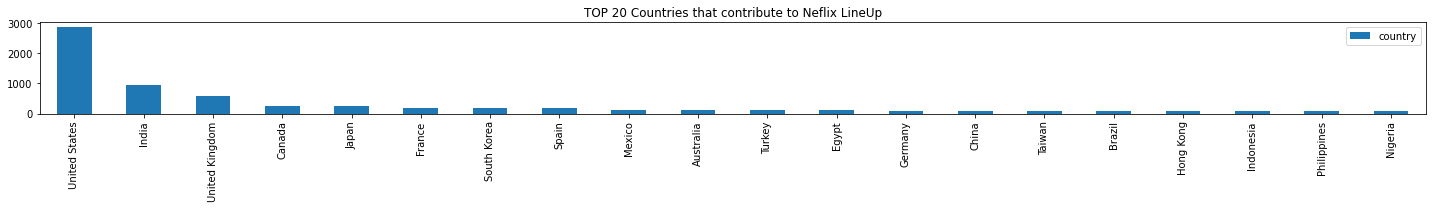

In [83]:
#plt.figure(figsize = (19,8))
#count_chart= Twenty_countries.plot(kind='bar') # ********************* This effectively calls a Series.plot() as opposed to a DataFrame.plot() both work


# Set the xlabel and ylabel using class methods
#count_chart.set_xlabel("country")
#count_chart.set_ylabel("Amount of shows")

#plt.show()
#plt.tight_layout()  




Twenty_countries.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title('TOP 20 Countries that contribute to Neflix LineUp')


plt.tight_layout()
plt.savefig("Top_20_Countries.png")
plt.show()

In [84]:
Twenty_countries

,country
United States,2883
India,956
United Kingdom,577
Canada,259
Japan,237
France,196
South Korea,194
Spain,168
Mexico,123
Australia,108


In [85]:
reduced_countries_df = renamed_Genres_df.loc[:, ["country", "Genres", "YEAR_added"]]
reduced_countries_df

,country,Genres,YEAR_added
0,Brazil,International TV Shows,2020.0
1,Mexico,Dramas,2016.0
2,Singapore,Horror Movies,2018.0
3,United States,Action & Adventure,2017.0
4,United States,Dramas,2020.0
...,...,...,...
7782,Sweden,Dramas,2020.0
7783,India,Dramas,2019.0
7784,NaN,Documentaries,2020.0
7785,Australia,International TV Shows,2020.0


In [86]:
#find overall count of genres
genres_CntryYR = renamed_Genres_df.loc[:, ["country", "Genres", "YEAR_added"]]

genres_CntryYRs_df = genres_top15 = renamed_Genres_df.loc[:, ["country", "Genres", "YEAR_added"]]
genres_CntryYRs_df

,country,Genres,YEAR_added
0,Brazil,International TV Shows,2020.0
1,Mexico,Dramas,2016.0
2,Singapore,Horror Movies,2018.0
3,United States,Action & Adventure,2017.0
4,United States,Dramas,2020.0
...,...,...,...
7782,Sweden,Dramas,2020.0
7783,India,Dramas,2019.0
7784,NaN,Documentaries,2020.0
7785,Australia,International TV Shows,2020.0


In [87]:
genres_CntryYRs_df.count()

country       7280
Genres        7787
YEAR_added    7689
dtype: int64

In [88]:
# The value_counts method counts unique values in a column
count = genres_CntryYRs_df.value_counts()
count

country        Genres                YEAR_added
India          Dramas                2018.0        154
United States  Dramas                2020.0        114
               Documentaries         2019.0        106
               Dramas                2019.0        105
               Comedies              2019.0        100
                                                  ... 
Mexico         Kids' TV              2019.0          1
                                     2017.0          1
               International Movies  2017.0          1
               Horror Movies         2017.0          1
Argentina      Action & Adventure    2016.0          1
Length: 1337, dtype: int64

In [89]:
 #main_movie_types = ['Dramas',
 #'Comedies',
 #'Documentaries',
 #'Action & Adventure',
 #'International TV Shows',
 #'Children & Family Movies',
 #'Crime TV Shows',
 #"Kids' TV",
 #'Stand-Up Comedy',
# 'Horror Movies',
 #'British TV Shows',
# 'Docuseries',
# 'Anime Series',
# 'International Movies',
# 'TV Comedies']

In [90]:
netflix_genres = renamed_Genres_df.loc[renamed_Genres_df["Genres"]=="Comedies"]
genres_CntryYRs_df = pd.DataFrame(netflix_genres)
genres_CntryYRs_df.count()

show_id         1074
type            1074
title           1074
director        1056
cast            1068
country         1048
country.1        102
country.2         27
YEAR_added      1074
release_year    1074
rating          1074
duration        1074
Genres          1074
TYPE2            977
TYPE3            664
description     1074
dtype: int64

In [91]:
netflix_info_Genres = renamed_Genres_df['Genres'].value_counts()
netflix_info_Genres 

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [92]:
netflix_info_Genres_df = pd.DataFrame(netflix_info_Genres)
fifteen_genres = netflix_info_Genres.head(15)


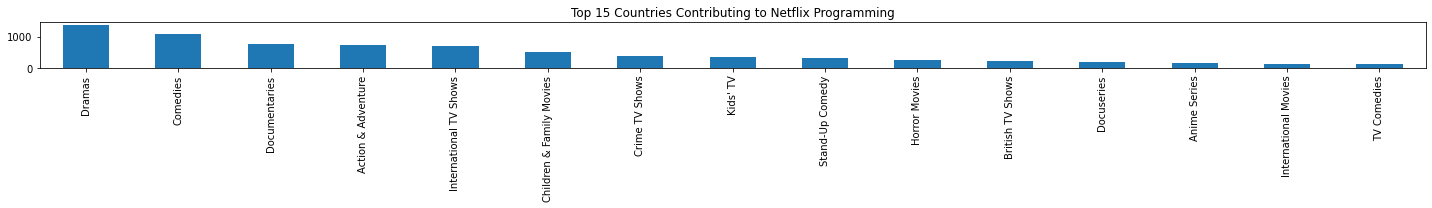

In [93]:
fifteen_genres.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title('Top 15 Countries Contributing to Netflix Programming')


plt.tight_layout()  
plt.savefig("Top15Genres.png")
plt.show()

In [94]:
fifteen_genres

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
British TV Shows             232
Docuseries                   194
Anime Series                 148
International Movies         114
TV Comedies                  110
Name: Genres, dtype: int64

In [95]:
genres_CntryYR

,country,Genres,YEAR_added
0,Brazil,International TV Shows,2020.0
1,Mexico,Dramas,2016.0
2,Singapore,Horror Movies,2018.0
3,United States,Action & Adventure,2017.0
4,United States,Dramas,2020.0
...,...,...,...
7782,Sweden,Dramas,2020.0
7783,India,Dramas,2019.0
7784,NaN,Documentaries,2020.0
7785,Australia,International TV Shows,2020.0


In [96]:
country_2014 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2014]
country_2014_df = pd.DataFrame(country_2014)
country_2014_df

,country,Genres,YEAR_added
914,United States,Stand-Up Comedy,2014.0
1026,United States,Movies,2014.0
1309,United States,Stand-Up Comedy,2014.0
1310,United States,Stand-Up Comedy,2014.0
1902,United States,Documentaries,2014.0
2294,United States,Documentaries,2014.0
2386,United Kingdom,Children & Family Movies,2014.0
2498,Canada,Kids' TV,2014.0
3057,United States,Children & Family Movies,2014.0
3643,Norway,Crime TV Shows,2014.0


In [97]:
fifteen_genres

Dramas                      1384
Comedies                    1074
Documentaries                751
Action & Adventure           721
International TV Shows       690
Children & Family Movies     502
Crime TV Shows               369
Kids' TV                     359
Stand-Up Comedy              321
Horror Movies                244
British TV Shows             232
Docuseries                   194
Anime Series                 148
International Movies         114
TV Comedies                  110
Name: Genres, dtype: int64

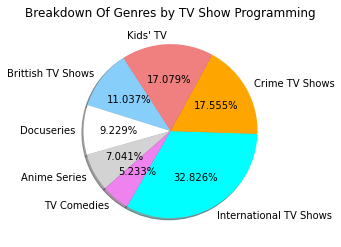

In [98]:
# Labels for the sections of our pie chartDramas                      1384

labelsTV = ["International TV Shows","Crime TV Shows","Kids' TV", "Brittish TV Shows", "Docuseries", "Anime Series", "TV Comedies"]

# The values of each section of the pie chart
sizes = [690, 369, 359, 232, 194, 148, 110]

# The colors of each section of the pie chart
colors = ["aqua", "orange", "lightcoral", "lightskyblue", "white", "lightgrey", "violet"]

# Tells matplotlib to seperate the 

plt.pie(sizes, labels=labelsTV, colors=colors,
        autopct="%3.3f%%", shadow=True, startangle=600)

plt.title('Breakdown Of Genres by TV Show Programming')
plt.savefig("Genres_TV_Pie.png")

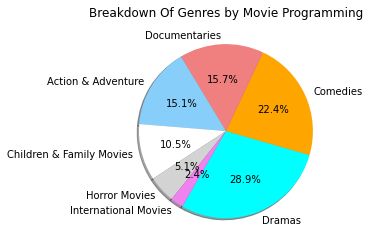

In [99]:
# Labels for the sections of our pie chartDramas                      1384

labelsMovies = ["Dramas","Comedies", "Documentaries", "Action & Adventure", "Children & Family Movies", "Horror Movies", "International Movies"]

# The values of each section of the pie chart
sizes = [1384, 1074, 751, 721, 502, 244, 114]

# The colors of each section of the pie chart
colors = ["aqua", "orange", "lightcoral", "lightskyblue", "white", "lightgrey", "violet"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, labels=labelsMovies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=600)

plt.title('Breakdown Of Genres by Movie Programming')
plt.savefig("Genres_Movie_Pie.png")

In [64]:
country_2016 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2016]
country_2016_df = pd.DataFrame(country_2016)
country_2016_df

,country,Genres,YEAR_added
1,Mexico,Dramas,2016.0
25,United States,Documentaries,2016.0
35,United States,Documentaries,2016.0
59,India,Dramas,2016.0
62,United States,Horror Movies,2016.0
...,...,...,...
7733,Taiwan,International TV Shows,2016.0
7737,Hong Kong,Action & Adventure,2016.0
7740,Japan,Anime Series,2016.0
7767,Pakistan,International TV Shows,2016.0


In [65]:
country_2017 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2017]
country_2017_df = pd.DataFrame(country_2017)
country_2017_df

,country,Genres,YEAR_added
3,United States,Action & Adventure,2017.0
5,Turkey,International TV Shows,2017.0
9,India,Horror Movies,2017.0
10,United States,Dramas,2017.0
33,United States,Comedies,2017.0
...,...,...,...
7743,Singapore,International TV Shows,2017.0
7753,Turkey,International TV Shows,2017.0
7761,Canada,Children & Family Movies,2017.0
7766,France,Kids' TV,2017.0


In [66]:
country_2018 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2018]
country_2018_df = pd.DataFrame(country_2018)
country_2018_df

,country,Genres,YEAR_added
2,Singapore,Horror Movies,2018.0
11,Poland,Crime TV Shows,2018.0
17,Norway,Dramas,2018.0
19,United Kingdom,Sports Movies,2018.0
20,India,Dramas,2018.0
...,...,...,...
7763,India,Dramas,2018.0
7768,Pakistan,Dramas,2018.0
7771,United States,Documentaries,2018.0
7776,India,Children & Family Movies,2018.0


In [67]:
country_2019 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2019]
country_2019_df = pd.DataFrame(country_2019)
country_2019_df

,country,Genres,YEAR_added
7,United States,Dramas,2019.0
8,India,Horror Movies,2019.0
12,Mexico,Crime TV Shows,2019.0
13,Thailand,Documentaries,2019.0
15,Nigeria,Dramas,2019.0
...,...,...,...
7774,United States,Cult Movies,2019.0
7777,NaN,Kids' TV,2019.0
7778,United States,Comedies,2019.0
7779,Mexico,International TV Shows,2019.0


In [68]:
country_2020 = reduced_countries_df.loc[reduced_countries_df["YEAR_added"]==2020]
country_2020_df = pd.DataFrame(country_2020)
country_2020_df

,country,Genres,YEAR_added
0,Brazil,International TV Shows,2020.0
4,United States,Dramas,2020.0
6,Egypt,Horror Movies,2020.0
14,United States,Independent Movies,2020.0
24,Japan,Anime Series,2020.0
...,...,...,...
7781,United States,Children & Family Movies,2020.0
7782,Sweden,Dramas,2020.0
7784,NaN,Documentaries,2020.0
7785,Australia,International TV Shows,2020.0


In [69]:
#renamed_Genres_df = top15_byCntry_df.rename(columns={"TYPE2": "Ge})
#renamed_Genres_df

In [70]:
#find way to do only top 15

#netflix_info_df.loc[netflix_info_df['country'].isin(country_top15)]


In [71]:
country_byGen =  reduced_countries_df.groupby(["Genres", "country"])
country_byGenre_df = pd.DataFrame(country_byGen.size())
country_byGenre_df

0
Genres             country           
Action & Adventure Argentina        2
                   Australia        7
                   Brazil           3
                   Bulgaria         2
                   Cambodia         1
...                                ..
Thrillers          Canada           2
                   Singapore        1
                   Spain            1
                   United Kingdom   4
                   United States   40

[530 rows x 1 columns]

In [72]:
#gen_byCntry .plot(kind="bar", figsize=(20,3))

# Set a title for the chart
#plt.title("Genres by Country")

#plt.show()
#plt.tight_layout()

In [73]:
netflix_tvshows = netflix_info.loc[netflix_info["type"]=="TV Show"]
netflix_tvshows_df = pd.DataFrame(netflix_tvshows)
netflix_tvshows_df.head()

,show_id,type,title,director,cast,country,country.1,country.2,YEAR_added,release_year,rating,duration,TYPE1/listed_in,TYPE2,TYPE3,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,NaN,NaN,2020.0,2020,TV-MA,4 Seasons,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,NaN,NaN,2017.0,2016,TV-MA,1 Season,International TV Shows,TV Dramas,TV Mysteries,A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...",Poland,United States,NaN,2018.0,2018,TV-MA,1 Season,Crime TV Shows,International TV Shows,TV Dramas,"In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,NaN,NaN,2019.0,2019,TV-MA,1 Season,Crime TV Shows,Docuseries,International TV Shows,Archival video and new interviews examine Mexi...
16,s17,TV Show,9-Feb,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,NaN,NaN,2019.0,2018,TV-14,1 Season,International TV Shows,TV Dramas,NaN,"As a psychology professor faces Alzheimer's, h..."
